# Native Simulation Plotting Scripts
## Combines data outputs from runs in folders 1,2,.... numReps to plot means over multiple replicas.  Contact maps, bond cosines, and energy components
## Saves necessary data to be used for making plots combining various chromosomes later.

In [36]:
import sys
import numpy as np
import scipy as sc
import os
import time
import matplotlib.pyplot as plt
import matplotlib as mpl
from random import randint
from array import *
import fileinput
import itertools
import linecache
from itertools import islice
from scipy.spatial import distance

#Width and height of axes.
w=2
h=2
plt.rcParams.update({'font.size': 12, 'figure.figsize': [w,h]})

#Don't show figures, only save:
#mpl.use('Agg')
    
if not os.path.exists('VisPlots'):
    os.makedirs('VisPlots')

In [37]:
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    
if not os.path.exists('VisPlots'):
    os.makedirs('VisPlots')
    
if not os.path.exists('VisPlots/ContactMaps'):
    os.makedirs('VisPlots/ContactMaps')
    
if not os.path.exists('VisPlots/DiffMaps'):
    os.makedirs('VisPlots/DiffMaps')

In [38]:
#Helper Function for setting figure size by axis size.
#set_size(w,h,ax)
def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

In [39]:
# Variables:
numBeads = 738
numReps = 40
jobName = 'Native15m'
enerFName = 'MeanEner.dat'
contMapFName = 'Prob7_7.dat'
cosFName = 'CosDict.txt'
Time_Label = '15m'
MSDFName = 'Native_MSD.txt'
PullCoordFName = 'Pull_Coord.txt'
eqBlocks = 100 #Number of simulation blocks to skip before recording pull coordinate for histograms.

# Contact Map:

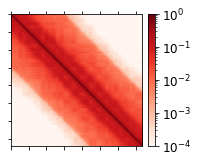

In [41]:
#Contact Map:

l=numBeads

r = np.genfromtxt('PlotData/'+jobName+'-Dist-all.dat',dtype='f8', delimiter=' ')
fig, ax = plt.subplots()
pos=ax.matshow(r,norm=mpl.colors.LogNorm(vmin=0.0001, vmax=1),cmap="Reds")
fig.colorbar(pos, ax = ax, fraction=0.046, pad=0.04)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
fig = plt.gcf()
set_size(w,h,ax)
fig.savefig('VisPlots/ContMap_'+jobName+'.pdf', dpi = 300,  bbox_inches='tight')
sys.stdout.flush()

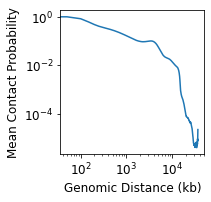

In [29]:
# P vs. D from contact map:
Prob_Data =  np.genfromtxt('PlotData/'+jobName+'-PvD-all.dat',dtype='f8', delimiter=' ')

fig, ax = plt.subplots()
ax.plot(50*np.array(range(l)),Prob_Data[1,:])
ax.set_xlabel('Genomic Distance (kb)')
ax.set_ylabel('Mean Contact Probability')
ax.set_yscale('log')
ax.set_xscale('log')
set_size(w,h,ax)
fig = plt.gcf()
fig.savefig('VisPlots/PvD_'+jobName+'.pdf',  bbox_inches='tight')

# Energy Components:

[0 1 2 3 4]
[15282.829376017657, 523.7588025474165, 721.0496468071947, -109.51132106975945, -3114.684805023866]
[0.3549185139599723, 0.6282771837862734, 5.8718265036101736, 0.49866120282953913, 10.072066560754985]


<ipython-input-30-ef8ca9cd199e>:25: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_xticklabels(EnergyNames, fontSize = 12)


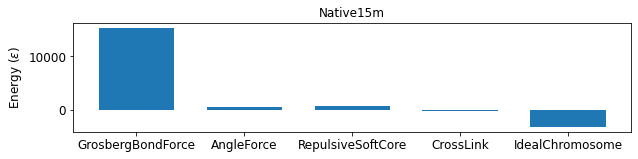

In [30]:
numEners = 5
file = open('PlotData/'+jobName+'-MeanEnergies-AllReps.dat', 'r')
lines = file.readlines()
MeanEnergies = [float(num) for num in lines[1].strip().split()]
MeanEnergies = MeanEnergies[:numEners]
StdEnergies = [float(num) for num in lines[2].strip().split()]
StdEnergies = StdEnergies[:numEners]
EnergyNames = [curname for curname in lines[0].strip().split()]#['Bonds', 'Angles', 'Soft Core', 'Type-Type', 'Ideal Chromosome']
EnergyNames = EnergyNames[:numEners]
#EnergyNames = ['Bonds', 'Angles', 'Soft Core', 'Type-Type', 'Ideal Chromosome']
x = np.arange(numEners)  # the label locations
width = 0.7  # the width of the bars
fig, ax = plt.subplots()
fig.set_figwidth(10)
print(x)
print(MeanEnergies)
print(StdEnergies)

ax.bar(x = x, height = MeanEnergies, width = width, yerr = StdEnergies)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r"Energy ($\epsilon$)")
ax.set_title(jobName)
ax.set_xticks(x)
ax.set_xticklabels(EnergyNames, fontSize = 12)
#fig.show()

fig = plt.gcf()
fig.savefig('VisPlots/Energies_'+jobName+'.pdf', dpi = 300,  bbox_inches='tight')

# Bond Cosines

In [31]:
# importing the module 
import ast 

## Open MeanCosDict Here
curfile = 'PlotData/'+'MeanCosDict.txt'
with open(curfile) as f:
    data = f.read() 
    print("Data type before reconstruction: ", type(data)) 
    # reconstructing the data as a dictionary 
    d = ast.literal_eval(data) 
    print("Data type after reconstruction : ", type(d)) 
    #print(d)
    MeanCosDict=d    

Data type before reconstruction:  <class 'str'>
Data type after reconstruction :  <class 'dict'>


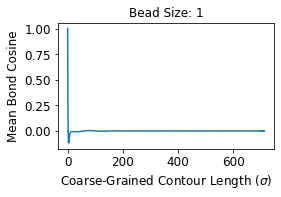

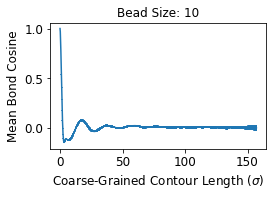

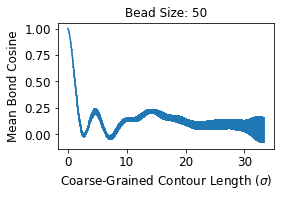

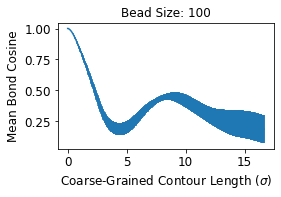

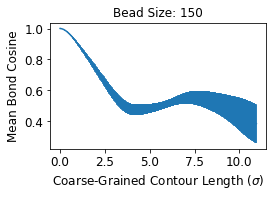

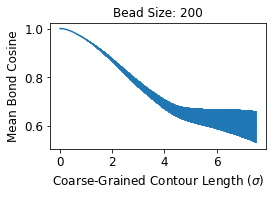

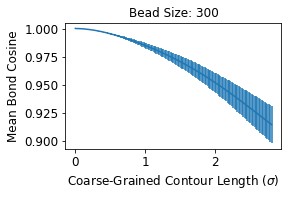

In [32]:
n_arr = list(MeanCosDict.keys())

for i,n in enumerate(n_arr, start = 0):

    fig, ax = plt.subplots()
    ax.set_title('Bead Size: '+ str(n))
    ax.errorbar(x=[0]+MeanCosDict[n]['len'], y=[1]+MeanCosDict[n]['cos'], yerr = [0]+MeanCosDict[n]['stdcos'])
    ax.set_xlabel(r"Coarse-Grained Contour Length ($\sigma$)")
    ax.set_ylabel("Mean Bond Cosine")
    set_size(3,1.75,ax)
    fig = plt.gcf()
    fig.savefig('VisPlots/AllCosines_'+str(n)+'_'+jobName+'.pdf', dpi = 300,  bbox_inches='tight')


## Combine MSD's into one plot

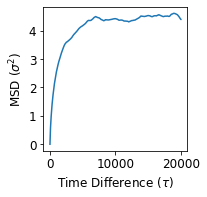

In [34]:
MSD_Data = np.genfromtxt('PlotData/'+jobName+'-MSD.dat',dtype='f8', delimiter=' ')
middle = len(MSD_Data)//2
time = MSD_Data[:middle]
MSDs = MSD_Data[middle:]
fig, ax = plt.subplots()
#ax.plot(MSD_Data[0,:],MSD_Data[1,:])
ax.plot(time, MSDs)
ax.set_xlabel(r"Time Difference ($\tau$)")
ax.set_ylabel(r"MSD ($\sigma^2$)")

set_size(w,h,ax)
fig = plt.gcf()
fig.savefig('VisPlots/MSD_'+jobName+'.pdf',  bbox_inches='tight')

## Make Histogram of pull coordinate and save bin edges and counts.

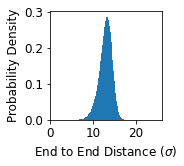

In [35]:
BinWidth = .1
maxDist = 26
Edges = np.arange(0, maxDist+BinWidth, BinWidth)

f = open('PlotData/HistData.txt',"r")
lines = f.readlines()
Bins = [float(num) for num in lines[1].strip().split()]
Centers = .5*np.add(Bins[1:],Bins[0:len(Bins)-1])


maxIndexHist = np.sum([cent<=maxDist for cent in Centers])

f, ax = plt.subplots()

BinVals = [float(num) for num in lines[0].strip().split()]
ax.bar(Centers[:maxIndexHist], BinVals[:maxIndexHist], width=.1)
ax.set_xlim(0, maxDist)
    
ax.set_xlabel(r"End to End Distance ($\sigma$)")
ax.set_ylabel(r"Probability Density")

#f.tight_layout()    
fig = plt.gcf()
fig.savefig('VisPlots/Hists_'+jobName+'.pdf',  bbox_inches='tight')